In [73]:
from xgboost import XGBRegressor
import xgboost as xgb
import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     train_test_split)
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.dummy import DummyRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def filter_model_columns(df: pd.DataFrame):
    exclude_cols = ['placekey',
                    'brands',
                    'latitude',
                    'longitude',
                    'street_address',
                    'date',
                    'week_day',
                    'is_weekend',
                    'number_devices_residing',
                    'postal_code',
                    'cbg_income',
                    'poi_cbg',
                    'is_holiday',
                    'population',
                    'month',
                    'year']
    cols = [col for col in df.columns if col not in exclude_cols]
    return df[cols]

In [64]:
df_original = pd.read_csv("testing.csv") 

df = filter_model_columns(df_original)
y = df.pop('visits')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
y_test = list(y_test)

In [95]:
params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}


reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
y_pred = reg.predict(X_test)
train_mse = mean_squared_error(y_train, reg.predict(X_train))
test_mse = mean_squared_error(y_test, reg.predict(X_test))
print(train_mse)
print(test_mse)

print(r2_score(y_train, reg.predict(X_train)))
print(r2_score(y_test, reg.predict(X_test)))

2880.279419634511
4073.0121927413616
0.791872555999704
0.7213632158242012


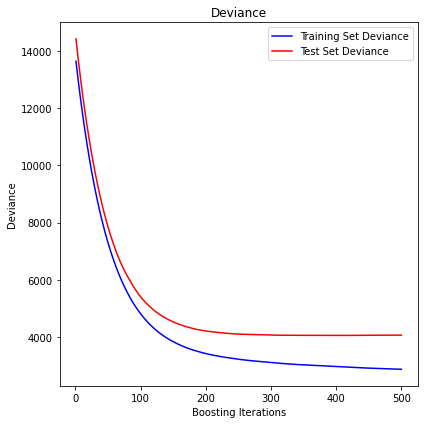

In [97]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [98]:
print(sum(y_pred)/len(y_pred))
print(sum(y_test)/len(y_test))

119.08751017299625
118.4714730847749


In [99]:
param = {'max_depth':5, 'eta': 0.3, 'objective': 'reg:squarederror', 'eval_metric':'rmse', 
         'subsample':0.9, 'colsample_bytree':0.5}


dtrain = xgb.DMatrix(X_train, label=y_train)
bst = xgb.train(params=param, dtrain=dtrain)

dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)

train_mse = mean_squared_error(y_train, bst.predict(dtrain))
test_mse = mean_squared_error(y_test, bst.predict(dtest))
print(train_mse)
print(test_mse)

print(r2_score(y_train, bst.predict(dtrain)))
print(r2_score(y_test, bst.predict(dtest)))

3600.433972925976
4011.2131148349586
0.7398345747399737
0.7255909213939407


In [100]:
print(sum(y_pred)/len(y_pred))
print(sum(y_test)/len(y_test))

115.93396440386913
118.4714730847749
